### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [111]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [112]:
#1
import pandas as pd

# Load the dataset (assuming CSV file format)
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')

# Display the first 5 columns
df.iloc[:, :5].head()

,application_id,gender,international,gpa,major
0,1,Female,False,3.30,Business
1,2,Male,False,3.28,Humanities
2,3,Female,True,3.30,Business
3,4,Male,False,3.47,STEM
4,5,Male,False,3.35,STEM


2. display the info column and conclude what the insight is from that column

In [113]:
#2
df.info()

#conclusion
#there is a missing value in some of the column and there are column that is int64,object and bool and the memory usage is only 441.7 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [114]:
#3a
a = df['admission'].value_counts(dropna=False)
print(a)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [115]:
#3b
a = df['race'].value_counts(dropna=False)
print(a)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [116]:
#4
df['admission'].fillna('deny',inplace=True)
df['race'].fillna('other',inplace=True)

<ipython-input-116-012cdca11366>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny',inplace=True)
<ipython-input-116-012cdca11366>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

5. recheck missing value

In [117]:
#5
a = df.isnull().sum()
a

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [118]:
# 6
a = df.drop('application_id',axis=1,inplace=True)
a

7. show describe column and conclude what the insight is from that column

In [119]:
#7
a = df.describe()
a
#conclusion
#The average gpa is 3.25 with min of 2.65 and max of 3.77 and the work_exp is 5.016 and the average gmat is 651 with min of 49 and max of 780

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

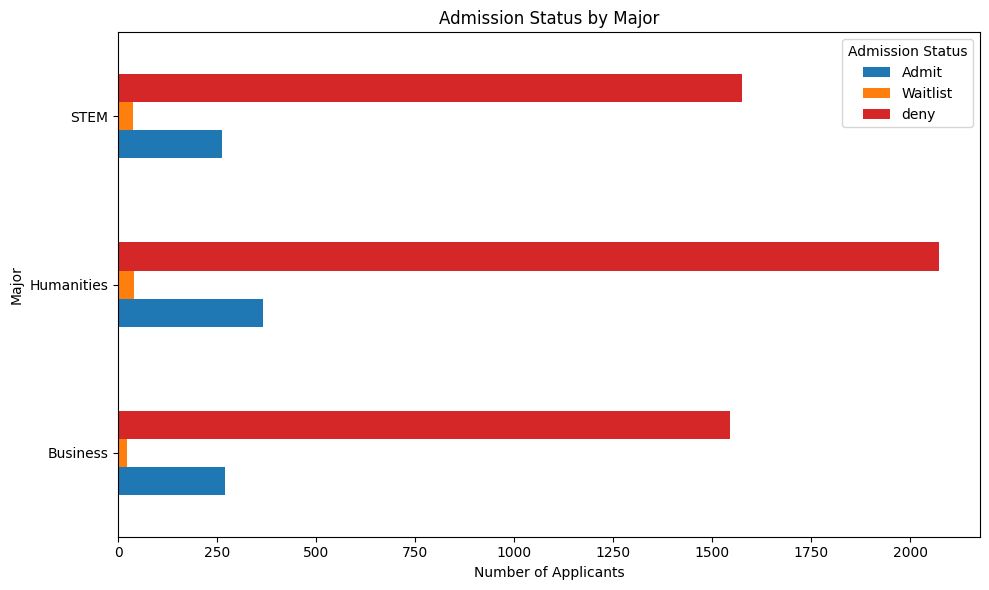

In [120]:
#8
import pandas as pd
import matplotlib.pyplot as plt

a=df.groupby(['major','admission'])['admission'].count().unstack()

# Plotting the stacked horizontal bar chart
a.plot(kind='barh', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#d62728'])

# Adding labels and title
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status', loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

#conclusion
#Many of the admission status in each major is mostly deny and there is a little that is in the waitlist

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

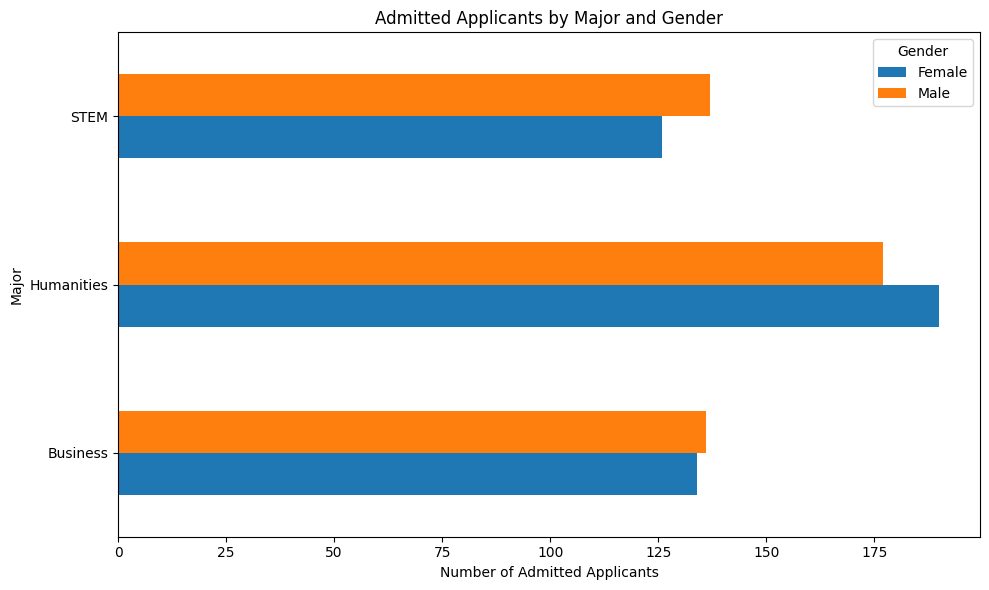

In [121]:
#9
import pandas as pd
import matplotlib.pyplot as plt

admitted_df = df[df['admission'] == 'Admit']
a=admitted_df.groupby(['major','gender'])['admission'].count().unstack()

# Plotting the stacked horizontal bar chart
a.plot(kind='barh', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#d62728'])

# Adding labels and title
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

#conclusion
#In major stem and business there are more male and in humanities there are more female

10. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

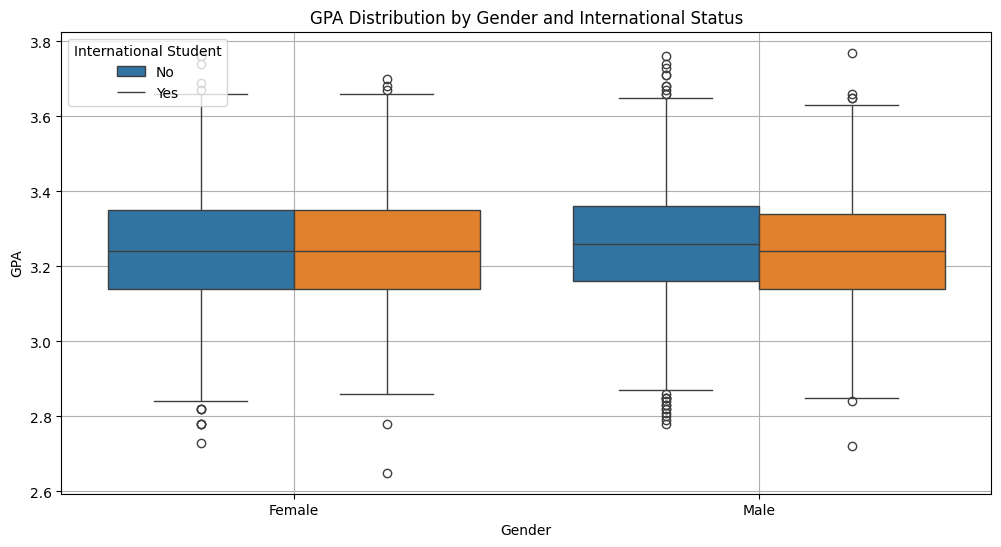

In [122]:
#10
# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='gpa', hue='international', data=df)
plt.title('GPA Distribution by Gender and International Status')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.legend(title='International Student', loc='upper left', labels=['No', 'Yes'])
plt.grid()
plt.show()
#The chart boxplot shows the distribution of GPAs across different genders, differentiated by whether the applicants are international students.observe if there are any significant differences in GPA distributions between male and female applicants, and whether international students tend to have higher or lower GPAs compared to their domestic counterparts.

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


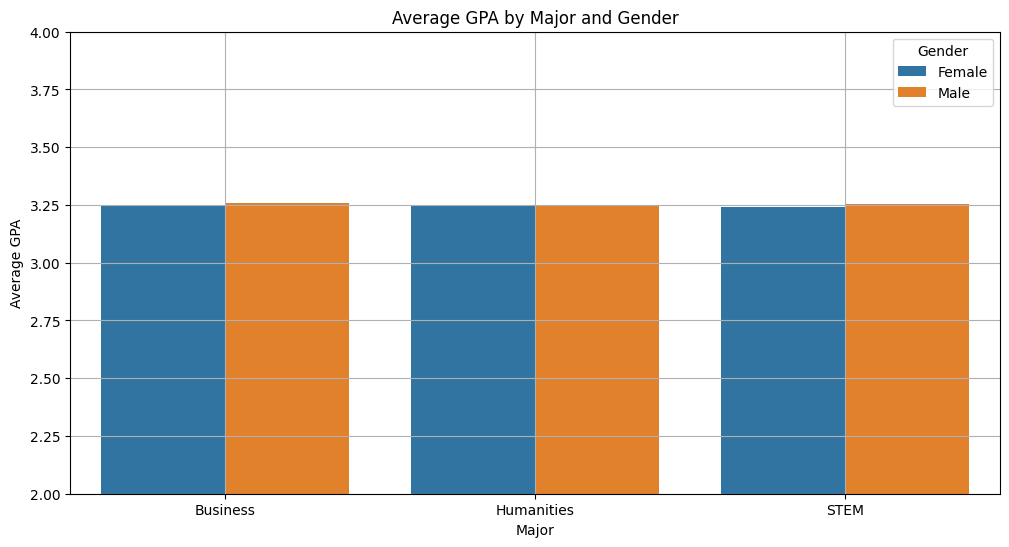

In [123]:
#11
avg_gpa = df.groupby(['major', 'gender'])['gpa'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='major', y='gpa', hue='gender', data=avg_gpa)
plt.title('Average GPA by Major and Gender')
plt.xlabel('Major')
plt.ylabel('Average GPA')
plt.ylim(2.0, 4.0)
plt.legend(title='Gender')
plt.grid()
plt.show()

#The bar chart illustrates the average GPA of students across different majors, separated by gender. By examining this visualization, we can see which majors tend to have higher average GPAs and whether there are notable differences between male and female students within those fields. For instance, if one major consistently shows higher GPAs for one gender, it may suggest either a difference in academic support, student interest, or demographic trends within those fields.

12. encode categorical columns and display the results

In [124]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [125]:
#12b
#encode y
#12b
#encode y
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['admission'] = encoder.fit_transform(df['admission'])
df['admission'] = df['admission'].replace({2: 1})
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

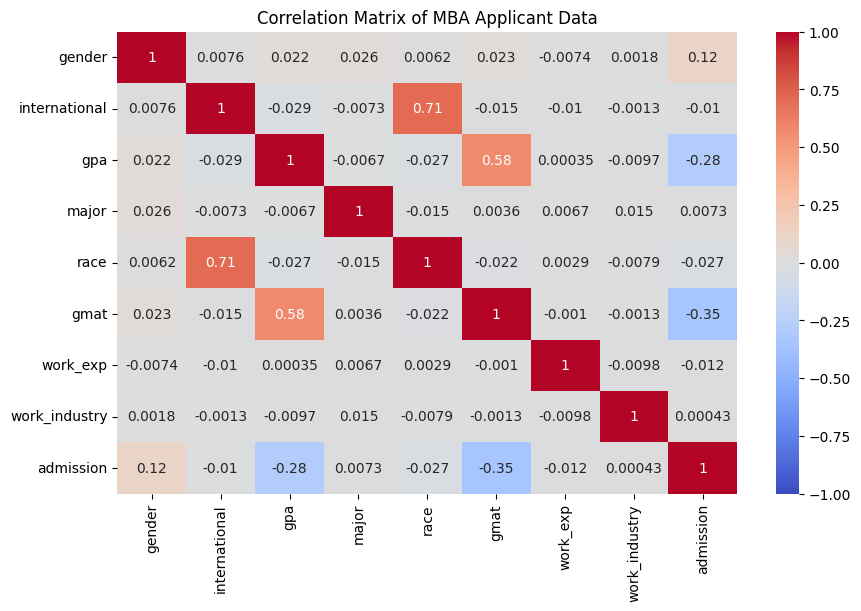

In [126]:
#13
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()


#Conclusion
#the highest negative corelation is between admission and (gpa,gmat) and the one that is closest to corelation is rance and international and gpa and gmat

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
average_gpa = df['gpa'].mean()

# Prepare Lisa's data
lisa_data = {
    'gender': 0,  # Assuming Lisa is female
    'international': 0,  # Local student
    'gpa': average_gpa,  # Average GPA
    'major': 0,  # Entrepreneurship
    'race': 0,  # Asian
    'gmat': 580.0,
    'work_exp': 2,  # 2018 to 2020
    'work_industry': 3
}

# Prepare features and target variable
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp','work_industry']]
y = df['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prepare Lisa's data for prediction
lisa_df = pd.DataFrame([lisa_data])

# Predict acceptance for Lisa
prediction = model.predict(lisa_df)

# Output prediction
result = "Accepted" if prediction[0] == 1 else "Rejected"
print(f"Prediction for Lisa: {result}")

Accuracy: 0.8280871670702179
Prediction for Lisa: Accepted
